In [1]:
!pip install opencv-python

In [8]:
import numpy as np
import os
import cv2
from scipy import ndimage

from zipfile import ZipFile
from scipy.fft import fft, fftshift, fft2, ifft2, ifftshift


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [9]:
def dilatacion(img, k):
    t, umbralizada = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((k, k), np.uint8)
    dilatacion = cv2.dilate(img, kernel, iterations = 1)
    plt.imshow(dilatacion, cmap="gray")
    return dilatacion


In [10]:
file_name='AML-KERNEL.zip'

with ZipFile(file_name, 'r') as zip:  #Sacamos la imagen
    zip.extractall(path='new_AML', members=None,)
    zip.close()

In [11]:
img= 'new_AML'
jpeglist = os.listdir(img)

In [12]:
output_images_path="output_AML"
if not os.path.exists(output_images_path):
    os.makedirs(output_images_path)

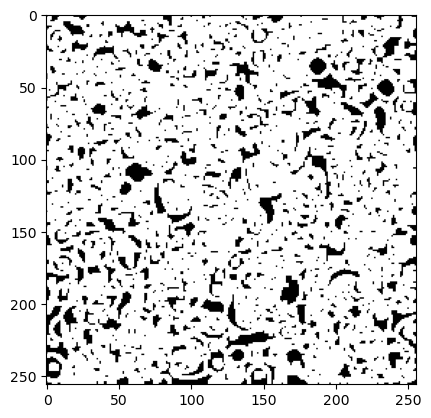

In [16]:
i = 0

for file in jpeglist:
    
    img_path= img + "/" + file
    image= cv2.imread(img_path, 0)    
    
    if image is None: 
        continue

    blurred= cv2.GaussianBlur(image, (3,3), 0)
    edged = cv2.Canny(blurred, 10, 100)
    cv2.imshow("Original Image", image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

    contours, _= cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    edged= dilatacion(edged, 3)
    edged= cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB)
    final= cv2.drawContours (edged, contours, -1, (0,0,255), -1)

    cv2.imwrite(output_images_path + "/image" + str(i) + ".jpg", final)

    cv2.imshow("Final Image", final)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
  
    i= i+1
